<a href="https://colab.research.google.com/github/kuresh02/Hotel_Booking_EDA/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


# Importing_Libraries

In [ ]:

# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
# Importing all import python libraries
import folium
import plotly.express as px


%matplotlib inline #It is a magic function that renders the figure in a notebook

UsageError: unrecognized arguments: #It is a magic function that renders the figure in a notebook


# Mounting_Drive

In [ ]:
#mounting driver from google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Csv_File_Location

In [ ]:
#csv file location
data_file_path="/content/drive/MyDrive/Capstone_Project/Capstone_Project_01_Exploratory Data Analysis/Project_Colab_NoteBook_&_Data/Data/Hotel Bookings.csv"


# Reading_Data_From_Csv_File

In [ ]:
# reading csv file

df= pd.read_csv(data_file_path)   
df.shape # understanding the total row and column by size

(119390, 32)

# Checking_Data_Frame_Shape(Row and Columns)

In [ ]:
#checking the number of rows and column numbers
print(type(df))
print(f' Our DataFrame have total {df.shape[0]} of rows.')
print(f' Our DataFrame have total {df.shape[1]} of columns.')

<class 'pandas.core.frame.DataFrame'>
 Our DataFrame have total 119390 of rows.
 Our DataFrame have total 32 of columns.


# DataFrame_Exploration

### Checking_1st_five_row

In [ ]:
# Checking first 5 rows
df.head() # by default it show 5 number of row data

### Checking_last_five_row

In [ ]:
# Checking last 5 rows
df.tail() # by default it show 5 number of row data

### Summary_statistics_of_the_Series_or_Dataframe

In [ ]:
#Showing at the min, max values,mean values etc for each and every columns. 
df.describe(include='all') # NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.

### Column_with_data_types_with_non_null_entries

In [ ]:
df.info()

## Finding_Name_Of_Column

In [ ]:
#Create a new copy of dataframe
df_copy=df.copy()
#print the dataframe Column
print(list(df_copy.columns))


['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


### 1) We have to understand what are the  column present in our dataframe
### 2) From that we can easy understand about our data dataframe by see unique value by every individual.

### Types_Of_Hotel

In [ ]:
# types of hotel
df_copy['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

### Canceled_Types

In [ ]:
# canceled or not 
df_copy['is_canceled'].unique()

### Arrival_Date_Year

In [ ]:
# arrival date years
df_copy['arrival_date_year'].unique()

### Meal_Type

In [ ]:
# types of meal 
df_copy['meal'].unique()

### Country_Name

In [ ]:
# types of country 
df_copy['country'].unique()

### Types_Of_Market_Sagment

In [ ]:
# types of market_segment 
df_copy['market_segment'].unique()

### Types_Of_Distrubution_Channel

In [ ]:
# types of distribution_channel 
df_copy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

### Types_Of_Rooms

In [ ]:
# types of reserved_room_type 
first_set=set(df_copy['reserved_room_type'].unique()) # types of reserved_room_type 

second_set=set(df_copy['assigned_room_type'].unique()) # types of assigned_room_type 

Total_room_type=first_set.union(second_set) 
print(sorted(Total_room_type)) #types of room preset for Hotel Booking

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P']


### Deposit_Type

In [ ]:
# types of deposit_type available
(df_copy['deposit_type'].unique()) # types of deposit_type 

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

### Distribution_Channel_Type

In [ ]:
# types of distribution_channel available

df_copy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

# Clearing Data Process

###The most important steps before going for the  EDA(Exploratory Data Analysis)
###As we know clearing data will remove the conflict between any duplicate data/row.
##We have to do the above data cleaning process through the following steps:-
###1) Remove all duplicate rows.
###2) Missing values finding and replacing with proper values
###3) Change required column data types from string to appropriate datatypes.
###4)  Adding some required new columns.

## </b>Step 1---> Remove all duplicate rows</b>.

In [ ]:
#total number to duplicated rows and number of columns present in dataframe
df_duplicate_value=(df_copy[df_copy.duplicated()].shape)
print(df_duplicate_value)



(31994, 32)


In [ ]:
# checking for the duplicate rows
df_copy.duplicated().value_counts()   #true means duplicate rows

False    87396
True     31994
dtype: int64

Duplicate Row Number 31994


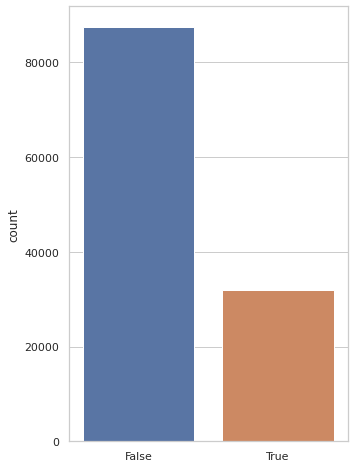

In [ ]:
# Plot a graph with respect to duplicate value
plt.figure(figsize=(5,8))

sns.set_theme(style="whitegrid")
sns.countplot(x=df_copy.duplicated())

no_of_duplicate_row=(df_duplicate_value[0])
print(f"Duplicate Row Number {no_of_duplicate_row}")


So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data by drop the row 

In [ ]:
# Dropping the duplicate values
df_copy.drop_duplicates(inplace = True)

In [ ]:
# New row size after drop of duplicate row
df_copy.shape

(87396, 32)

## </b>Step 2---> Missing values finding and replacing with proper values</b>.

In [ ]:
## Check any Null value present in columns
df_copy.isnull().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

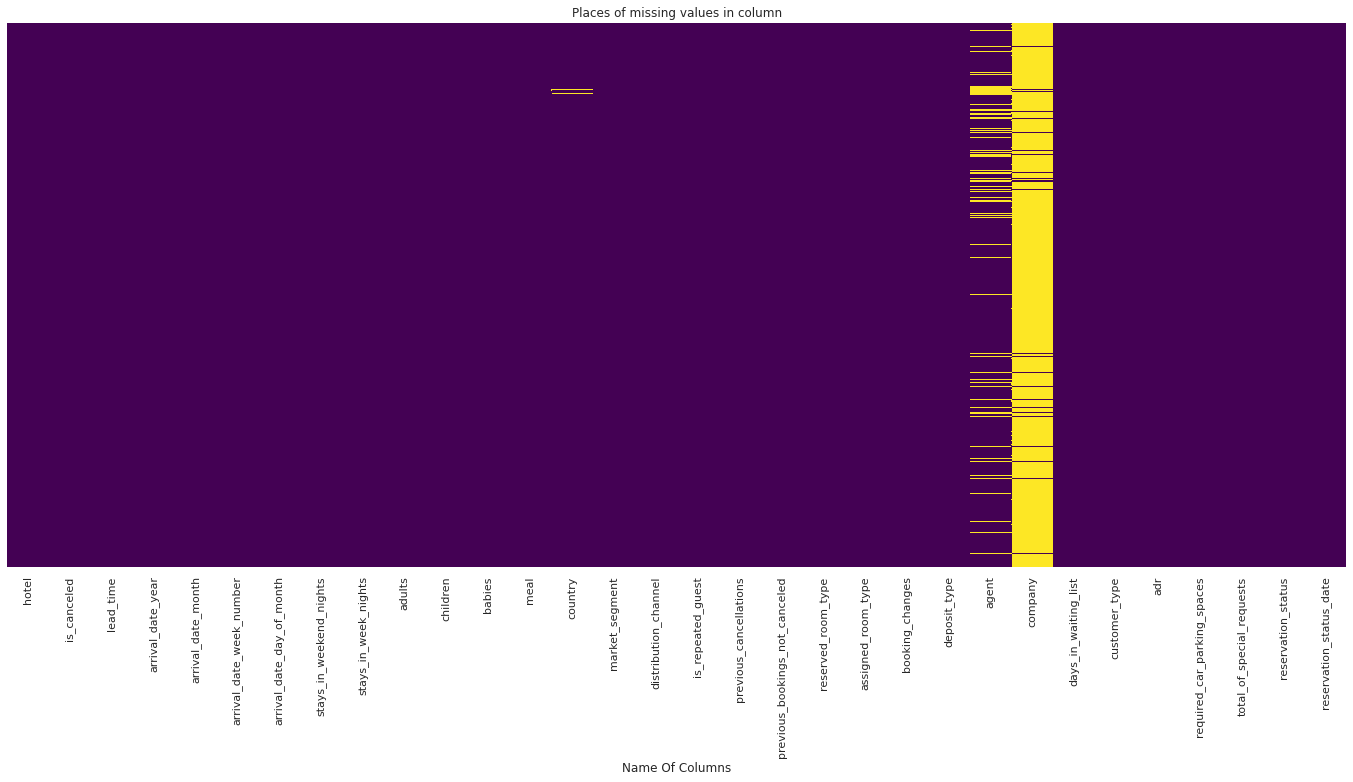

In [ ]:
# graphical heat map for all null value in column

plt.figure(figsize=(24,10))
sns.heatmap(df_copy.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

## 1) From above data  we can clearly mark that some people who book rooms are not depends upon any agent or company fpr their booking room.
## 2) Here  only 4 Columns have Null value so to make this data a meaning full values we have to remove the Null value  there and replace with 0.


In [ ]:
df_copy = df_copy.replace(np.NaN, 0)
df_copy.isnull().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',int(0):'Null values'})
df_copy.head(5)


## Step 3---> Change required column data types from string to appropriate datatypes.

In [ ]:
# Change  datatype of columns 'children', 'company' and 'agent' from float to int.
df_copy[['children', 'agent', 'company']] = df_copy[['children', 'agent','company']].astype('int64')
df_copy["reservation_status_date"]=pd.to_datetime(df_copy["reservation_status_date"], format = '%Y-%m-%d')
# df_copy['reservation_status_date']=pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

# Step 4--->Adding some required new columns.

## New Column for Total_Day

In [ ]:
# total days staying in hotels
df_copy['total_day'] = (df_copy['stays_in_weekend_nights']+df_copy['stays_in_week_nights'])



## New Column for Total_People

In [ ]:
# Adding total people total_people = num of adults + children + babies
df_copy['total_people'] = df_copy['adults']+df_copy['children']+df_copy['babies']

# EDA----->(Exploratory_Data_Analysis)

# 1) Which Year most Booking happen?

In [ ]:
# return highest bookings made in a year
highest_bookings= df_copy.groupby(['arrival_date_year'])['arrival_date_year'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)
# bookings made in a year
top_ten_highest_bookings=highest_bookings[:]
top_ten_highest_bookings

,arrival_date_year,Most_Bookings
1,2016,42391
2,2017,31692
0,2015,13313


### Visualizing_by_plotting_graph

Text(0.5, 1.0, 'df_copy')

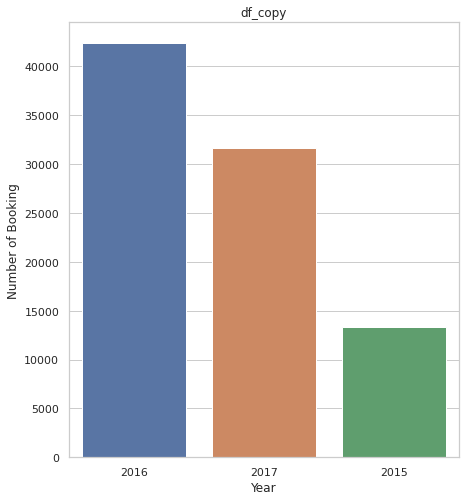

In [ ]:
#set plotsize
plt.figure(figsize=(7,8))
#plotting of bar
sns.countplot(x=df_copy['arrival_date_year'],order=df_copy['arrival_date_year'].value_counts().index)
#  set x-label in plot
plt.xlabel('Year')
# set y-label in the plot
plt.ylabel('Number of Booking')
# set title for the plot
plt.title("df_copy")

## Observation from the Graph 
### In the year 2016 Most number of Booking happend in Hotels.

# 2) Country With Highest Number of Booking

In [ ]:
# return highest bookings made in a year
country_list= df_copy.groupby(['country'])['country'].agg({'count'}).reset_index().rename(columns={'index': "country" }).sort_values(by='count',ascending=False)
country_list.drop(country_list[country_list['country']==0].index,inplace=True) 
country_list=country_list[:20]
country_list

,country,count
136,PRT,27453
60,GBR,10433
57,FRA,8837
52,ESP,7252
44,DEU,5387
82,ITA,3066
77,IRL,3016
16,BEL,2081
26,BRA,1995
124,NLD,1911


### Visualizing_by_plotting_graph

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

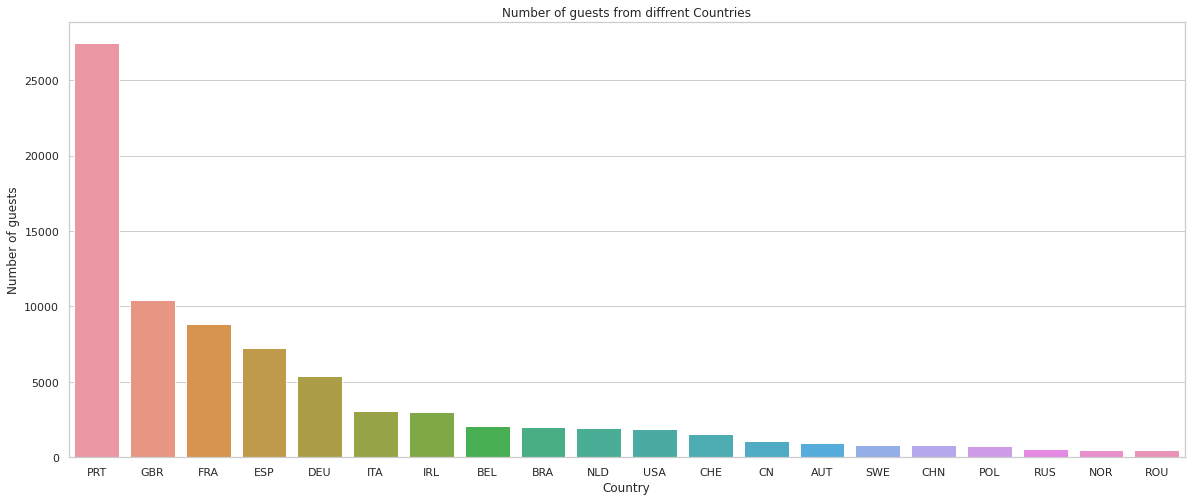

In [ ]:
# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_list['country'],y=country_list['count'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

# 3) Map wise desity graph

In [ ]:
import folium                               
import plotly.express as px
# searched on google 
basemap = folium.Map()
guests_map = px.choropleth(country_list, locations = country_list['country'],color = country_list['count'], hover_name = country_list['country'])
guests_map.show()